In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/NLP

/content/drive/My Drive/NLP


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import re
import nltk
import pandas as pd
import nltk as nlp
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from datasets import load_dataset

# Veri kümesini yükleyin
dataset = load_dataset("winvoker/turkish-sentiment-analysis-dataset")

# Eğitim, doğrulama ve test verilerini alın
df_train = dataset["train"]
df_test = dataset["test"]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [ ]:
df_train = df_train.drop('dataset', axis=1)
df_test = df_test.drop('dataset', axis=1)
df_train['label'] = df_train['label'].replace({'Negative': 0, 'Notr': 1, 'Positive': 2})
df_test['label'] = df_test['label'].replace({'Negative': 0, 'Notr': 1, 'Positive': 2})

In [ ]:
df_train.head()

,text,label
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,2
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",2
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",2
3,Çünkü aranan tapınak bu bölgededir .,1
4,bu telefonu başlıca alma nedenlerim ise elimde...,2


In [ ]:
df_test.head()

,text,label
0,Kral akbaba dikkat çekici renklere sahiptir .,1
1,ısrarla korkutmayı başarıyor. sanki korku çok...,2
2,Neşe ve Üzüntü köprünün kırılmaya başlamasıyla...,1
3,i phone 5 ten sonra gene 4'' ekranı tercih ett...,2
4,Beşinci sezonda diziye yeni oyuncular katıldı .,1


In [ ]:
def pre_processing(text):
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
    text=" ".join(text)
    return text

In [ ]:
df_train["clean_text"]=df_train["text"].apply(lambda x: pre_processing(x))
df_test["clean_text"]=df_test["text"].apply(lambda x: pre_processing(x))

In [ ]:
df_train.head()

,text,label,clean_text
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,2,ürünü hepsiburadadan alalı hafta oldu orjinal ...
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",2,ürünlerden memnunum kesinlikle herkese tavsiye...
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",2,hızlı kargo temiz alışveriş teşekkür ederim
3,Çünkü aranan tapınak bu bölgededir .,1,aranan tapınak bölgededir
4,bu telefonu başlıca alma nedenlerim ise elimde...,2,telefonu başlıca alma nedenlerim elimdeki sams...


In [ ]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["label"]
y_test=df_test["label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (440679,)
x_test (48965,)
y_train (440679,)
y_test (48965,)


In [ ]:
import joblib

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

### C=1.0, penalty='l2'
LogisticRegression = Pipeline([('tfidf', TfidfVectorizer()),('clf', LogisticRegression(random_state=0, class_weight='balanced',max_iter = 200))])

LogisticRegression.fit(X_train, y_train)
joblib.dump(LogisticRegression, 'logistic_regression_model.joblib')

# Modeli dosyadan yükleme (daha sonra kullanmak için)
loaded_model = joblib.load('logistic_regression_model.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
### Inference

In [ ]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds))
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

CV average score: 0.94
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      5656
           1       0.95      0.99      0.97     17092
           2       0.94      0.95      0.95     26217

    accuracy                           0.94     48965
   macro avg       0.92      0.89      0.90     48965
weighted avg       0.94      0.94      0.94     48965

Train Accuracy : 0.956
Test Accuracy : 0.939
0.921136327247646 : is the precision score
0.8895350828922178 : is the recall score
0.9031814148687743 : is the f1 score


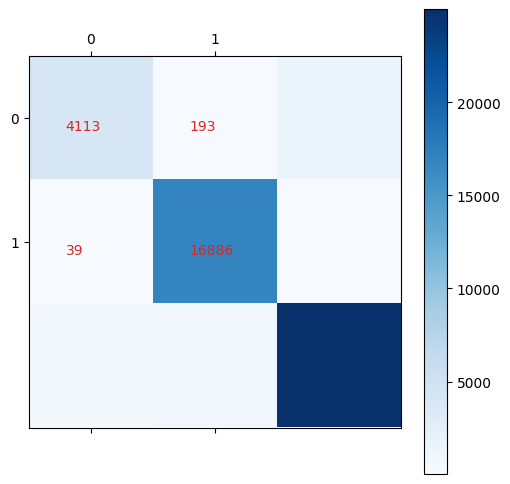

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

cv_scores = cross_val_score(loaded_model, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

result = loaded_model.predict(X_test)
cr = classification_report(y_test, result)
print(cr)


print('Train Accuracy : %.3f'%loaded_model.score(X_train, y_train))
print('Test Accuracy : %.3f'%loaded_model.score(X_test, y_test))



y_pred = loaded_model.predict(X_test)
print(precision_score(y_test, y_pred ,average='macro') , ": is the precision score")
print(recall_score(y_test, y_pred,average='macro'), ": is the recall score")
print(f1_score(y_test, y_pred ,average='macro'), ": is the f1 score")

plot_confusion_matrix(y_test, loaded_model.predict(X_test))